### Import Libraries & Read the Dataset

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
heart = pd.read_csv('ht.csv')

In [124]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Exploratory Data Analysis

In [125]:
# get the info of int and object values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


C:\Users\Ajai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

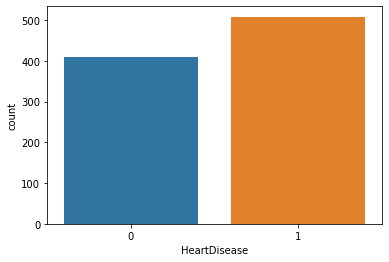

In [126]:
sns.countplot(heart['HeartDisease'])

In [127]:
a = heart[heart['HeartDisease']==0]
print(a)
b = heart[heart['HeartDisease']==1]
print(b)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
2     37   M           ATA        130          283          0         ST   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
903   56   M           ATA        130          221          0        LVH   
904   56   M           ATA        120          240          0     Normal   
906   55   F           ATA        132          342          0     Normal   
910   41   M           ATA        120          157          0     Normal   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [128]:
# see how many missing values there are
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Outlier Removal

<AxesSubplot:>

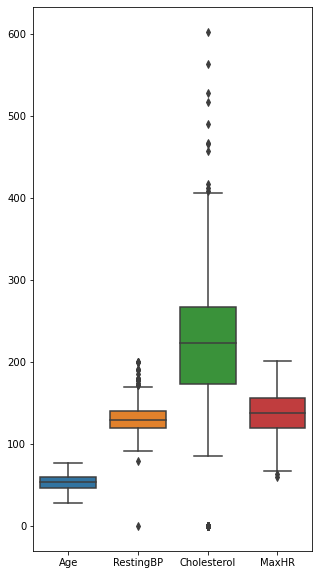

In [129]:
# check outliers for the non-categorical columns 
# Age, RestingBP, Cholestrol and MaxHR

nc = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
plt.figure(figsize =(5,10))
sns.boxplot(data = heart[nc])

### Label Encoding

#### Section where all the classes will turn into binary

In [130]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [131]:
# corrMatrix = heart.corr().round(2)
# plt.figure(figsize=(10,10))
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [132]:
# eg. checking for chest pain type
heart['ChestPainType'].unique()


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [133]:
# importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [134]:
# labelling the classification columns
Sex = enc.fit_transform(heart['Sex'])
ChestPainType = enc.fit_transform(heart['ChestPainType'])
RestingECG = enc.fit_transform(heart['RestingECG'])
ExerciseAngina = enc.fit_transform(heart['ExerciseAngina'])
ST_Slope = enc.fit_transform(heart['ST_Slope'])

In [135]:
# replacing the labelling
heart['Sex'] = Sex
heart['ChestPainType'] = ChestPainType
heart['RestingECG'] = RestingECG
heart['ExerciseAngina'] = ExerciseAngina
heart['ST_Slope'] = ST_Slope

In [136]:
heart.to_csv('heart_dis_pred.csv')

In [137]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


### Normalisation

In [138]:
# fit within the standard scaler

In [140]:
x = heart.drop('HeartDisease', axis = 1)
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values
y = heart['HeartDisease']

### Test / Train Split --> Partitioning the data 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [142]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
853,0.387755,1.0,0.666667,0.690,0.426202,0.0,0.0,0.676056,0.0,0.295455,1.0
110,0.632653,0.0,0.333333,0.650,0.311774,0.0,0.5,0.450704,0.0,0.409091,0.5
137,0.224490,1.0,0.333333,0.600,0.399668,0.0,1.0,0.605634,0.0,0.522727,1.0
325,0.285714,1.0,0.000000,0.525,0.000000,1.0,0.5,0.478873,1.0,0.125000,0.0
891,0.775510,0.0,0.666667,0.730,0.461028,0.0,0.0,0.647887,0.0,0.295455,0.5
...,...,...,...,...,...,...,...,...,...,...,...
855,0.816327,1.0,0.666667,0.900,0.454395,1.0,0.0,0.633803,1.0,0.477273,0.5
871,0.673469,1.0,0.666667,0.750,0.402985,1.0,0.5,0.542254,1.0,0.409091,0.5
835,0.530612,1.0,0.000000,0.550,0.396352,0.0,0.5,0.464789,1.0,0.613636,0.5
792,0.367347,1.0,0.666667,0.750,0.383085,0.0,0.5,0.612676,0.0,0.704545,0.5


### SVM

#### Optimisation

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [145]:
svm_pm = {'C':[0.01, 0.1, 1, 10], 'kernel':('linear', 'sigmoid', 'rbf', 'poly'), 'degree':[2,5,7] }

In [146]:
# optimising the hyperparameters with grid search
model = SVC()
gs_svm = GridSearchCV(model, svm_pm, cv=10, refit = True)


In [147]:
gs_svm.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 5, 7],
                         'kernel': ('linear', 'sigmoid', 'rbf', 'poly')})

In [148]:
# best score of the grid search
best_gs_svm_score = gs_svm.best_score_
print(best_gs_svm_score)

0.8648337595907929


In [149]:
# best parameters of the grid search
best_gs_svm_pm = gs_svm.best_params_
print(best_gs_svm_pm)

{'C': 1, 'degree': 2, 'kernel': 'rbf'}


In [150]:
# best score on training data
gs_svm.score(X_train, y_train)

0.8837209302325582

#### Testing

In [151]:
# best test score
gs_svm.score(X_test, y_test)

0.8695652173913043

In [152]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

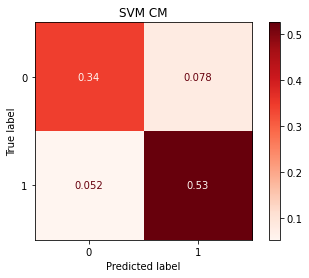

In [153]:
# Confusion matrix for the testing set 
cm_test = plot_confusion_matrix(gs_svm, X_test, y_test, cmap = plt.cm.Reds, normalize = 'all')
cm_test.ax_.set_title('SVM CM')
plt.show()

In [154]:
precision, recall, f, support = precision_recall_fscore_support(y_test, gs_svm.predict(X_test))
print('SVM Precision', precision, '\nSVM Recall', recall, '\nSVM F1', f, '\nSVM Support', support)

SVM Precision [0.86813187 0.8705036 ] 
SVM Recall [0.81443299 0.90977444] 
SVM F1 [0.84042553 0.88970588] 
SVM Support [ 97 133]


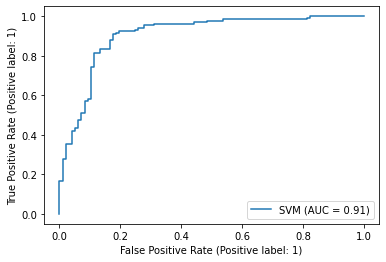

In [155]:
metrics.plot_roc_curve(gs_svm, X_test, y_test, name = 'SVM')

### MLP

#### Model 

In [156]:
# pip install torchvision

In [157]:
# pip install skorch

In [158]:
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import time

In [159]:
# dataframe to series
y_train = y_train.squeeze()

In [160]:
# dataset to tensor
X_trainT = torch.tensor(X_train.to_numpy()).float()
y_trainT = torch.tensor(y_train.to_numpy()).long()

In [161]:
input_size = len(X_train.columns)
hidden_size = 10
output_size = 2

In [162]:
# defining the dataset class to build the model
class MLP(nn.Module):
    def __init__(self, hidden_size=150, nonlin = F.relu):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.nonlin = nonlin
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, z):
        hidden = self.nonlin(self.fc1(z))
        hidden = F.relu(self.fc2(hidden))
        out = F.softmax(self.fc3(hidden), dim=1)
        return out
    
mlp = NeuralNetClassifier(MLP)

#### Optimisation

In [163]:
mlp_pm = {'lr':[0.05, 0.2, 0.3], 'optimizer__momentum': [0.8, 0.85, 0.9], 'module__hidden_size': [50, 100, 200],}

gs_mlp = GridSearchCV(mlp, mlp_pm, refit = True, cv = 10, verbose = 0)

gs_mlp.fit(X_trainT, y_trainT)


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6788       0.7742        0.6696  0.0156
      2        0.6609       0.6855        0.6489  0.0237
      3        0.6375       0.7661        0.6238  0.0143
      4        0.6077       0.8306        0.5913  0.0173
      5        0.5693       0.8145        0.5519  0.0183
      6        0.5242       0.8065        0.5101  0.0205
      7        0.4795       0.8145        0.4759  0.0189
      8        0.4442       0.8065        0.4541  0.0209
      9        0.4221       0.8065        0.4420  0.0199
     10        0.4094       0.8065        0.4361  0.0135
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6927       0.7903        0.6823  0.0037
      2        0.6798       0.5403        0.6704  0.0245
      3        0.6662       0.5403        0.6579  0.0162
      4        0.6517       0.6

GridSearchCV(cv=10,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
),
             param_grid={'lr': [0.05, 0.2, 0.3],
                         'module__hidden_size': [50, 100, 200],
                         'optimizer__momentum': [0.8, 0.85, 0.9]})

In [164]:
# best score of the grid search
best_gs_mlp_score = gs_mlp.best_score_
print(best_gs_mlp_score)

0.8575021312872975


In [165]:
# best parameters of the grid search
best_gs_mlp_pm = gs_mlp.best_params_
print(best_gs_mlp_pm)

{'lr': 0.2, 'module__hidden_size': 200, 'optimizer__momentum': 0.8}


In [166]:
# best score on training data
gs_mlp.score(X_trainT, y_trainT)

0.8706395348837209

#### Testing 

In [167]:
# dataframe to series
y_test = y_test.squeeze()

In [168]:
# dataset to tensor
X_testT = torch.tensor(X_test.to_numpy()).float()
y_testT = torch.tensor(y_test.to_numpy()).long()

In [169]:
gs_mlp.score(X_testT, y_testT)

0.8521739130434782

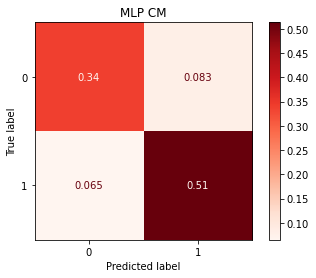

In [170]:
# Confusion matrix for the testing set 
cm_mlp_test = plot_confusion_matrix(gs_mlp, X_testT, y_testT, cmap = plt.cm.Reds, normalize = 'all')
cm_mlp_test.ax_.set_title('MLP CM')
plt.show()

In [171]:
precision, recall, f, support = precision_recall_fscore_support(y_testT, gs_svm.predict(X_testT))
print('MLP Precision', precision, '\nMLP Recall', recall, '\nMLP F1', f, '\nMLP Support', support)

MLP Precision [0.86813187 0.8705036 ] 
MLP Recall [0.81443299 0.90977444] 
MLP F1 [0.84042553 0.88970588] 
MLP Support [ 97 133]


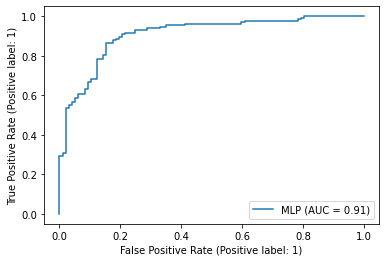

In [172]:
metrics.plot_roc_curve(gs_mlp, X_testT, y_testT, name = 'MLP')